In [73]:
%%latex

Solution to 2(a)

A good starting point is an expression which connects $t^{(i)}$, $x^{(i)}$ and $y^{(i)}$. That expression is $p(y^{(i)} = 1 \mid t^{(i)} = 1, x^{(i)})$.

Applying the rule $p(A \mid B) p(B) = p(A \cap B)$ to that expression, see that $p(y^{(i)} = 1 \mid t^{(i)} = 1, x^{(i)}) p(t^{(i)} = 1, x^{(i)}) = p(y^{(i)} = 1, t^{(i)} = 1, x^{(i)})$ with $A = \{y^{(i)} = 1\}$, $B = \{t^{(i)} = 1\} \cap \{x^{(i)}\}$. 

Then note that $p(y^{(i)}=1, t^{(i)}=1, x^{(i)}) = p(t^{(i)}=1, y^{(i)}=1, x^{(i)})$ since clearly $\{y^{(i) = 1}\} \cap \{t^{(i)} = 1\} \cap \{x^{(i)}\} = \{t^{(i)} = 1\} \cap \{y^{(i)} = 1\} \cap \{x^{(i)}\}$.

Finally, apply the $p(A \mid B) p(B) = p(A \cap B)$ rule again to $p(t^{(i)} = 1, y^{(i)}, x^{(i)})$ with $A = \{t^{(i)} = 1\}$, $B = \{y^{(i)} = 1\} \cap \{x^{(i)}\}$ to get $p(t^{(i)} = 1, y^{(i)} = 1, x^{(i)}) = p(t^{(i)} = 1 \mid y^{(i)} = 1, x^{(i)}) p(y^{(i)} = 1, x^{(i)})$.

Putting this information together, we get

$$ 
p(y^{(i)} = 1 \mid t^{(i)} = 1, x^{(i)}) p(t^{(i)} = 1, x^{(i)})=
 p(t^{(i)} = 1 \mid y^{(i)} = 1, x^{(i)}) p(y^{(i)} = 1, x^{(i)})
$$

We can simplify further the terms $p(t^{(i)} = 1, x^{(i)})$ and $p(y^{(i)} = 1, x^{(i)})$, again using the rule $p(A \mid B) p(B) = p(A \cap B)$, to get $p(t^{(i)} = 1, x^{(i)}) = p(t^{(i)}=1 \mid x^{(i)}) p(x^{(i)})$ and $p(y^{(i)} = 1, x^{(i)}) = p(y^{(i)}=1 \mid x^{(i)}) p(x^{(i)})$ respectively. Substituting these expressions into the equation above (and cancelling out the $p(x^{(i)})$ terms), we get:

$$
p(y^{(i)}=1 \mid t^{(i)}=1, x^{(i)}) p(t^{(i)} = 1 \mid x^{(i)}) = p(t^{(i)}=1 \mid y^{(i)}=1, x^{(i)}) p(y^{(i)}=1 \mid x^{(i)})
$$.

Finally, note that $p(t^{(i)}=1 \mid y^{(i)}=1, x^{(i)}) = 1$, because by assumption, only positive examples are labelled. Furthermore, the question assumes that $p(y^{(i)}=1 \mid t^{(i)}=1, x^{(i)}) = p(y^{(i)}=1 \mid t^{(i)}=1)$. Applying these to the above equation, finally arrive at the conclusion:

$$
p(y^{(i)}=1 \mid t^{(i)}=1)p(t^{(i)}=1 \mid x^{(i)}) = p(y^{(i)}=1 \mid x^{(i)})
$$,

i.e. find that $\alpha = p(y^{(i)}=1 \mid t^{(i)}=1)$.

<IPython.core.display.Latex object>

In [79]:
%%latex

Solution to 2(b)

$h(x^{(i)}) \approx p(y^{(i)}=1 \mid x^{(i)}) = \alpha \times p(t^{(i)}=1 \mid x^{(i)})$ (the equality is from the previous part). But the question assumes that $p(t^{(i)} = 1 \mid x^{(i)}) \approx 1$ for $x^{(i)} \in V_{+}$, hence $h(x^{(i)}) \approx \alpha$ for $x^{(i)} \in V_{+}$.

<IPython.core.display.Latex object>

In [51]:
# Class from 1 (b) which will be used for 2 (c), 2 (d) and 2 (e)
import numpy as np

from linear_model import LinearModel

class LogisticRegression(LinearModel):
    """Logistic regression with Newton's Method as the solver.

    Example usage:
        > clf = LogisticRegression()
        > clf.fit(x_train, y_train)
        > clf.predict(x_eval)
    """

    def fit(self, x, y):
        """Run Newton's Method to minimize J(theta) for logistic regression.

        Args:
            x: Training example inputs. Shape (m, n).
            y: Training example labels. Shape (m,).
        """
        # *** START CODE HERE ***

        # Initial value of theta is the zero vector as requested in the problem
        theta = np.zeros(x.shape[1])
        # Update theta until the stopping condition is met
        while True:
            # First find h_theta, this is an m x 1 vector where ith entry is g(theta^T x^(i))
            h_theta = 1 / (1 + np.exp(-x @ theta))
            # multiplication and subtraction are elementwise, then convert into diagonal matrix with np.diag
            D = np.diag(h_theta * (1 - h_theta))
            # Compute the Hessian using the formula H = 1/m * X^T D X
            H = x.T @ D @ x / x.shape[0]
            # Compute the gradient using the formula g = 1/m * X^T (h_theta - y)
            g = x.T @ (h_theta - y) / x.shape[0]
            # Make a copy of theta before updating it
            old_theta = theta
            # Compute the new theta using the update rule theta = theta - H^(-1) g
            theta = theta - np.linalg.inv(H) @ g
            # Check if the stopping condition is met
            if np.linalg.norm(theta - old_theta) < self.eps:
                break
        # Update theta
        self.theta = theta

        # *** END CODE HERE ***

            

    def predict(self, x):
        """Make a prediction given new inputs x.

        Args:
            x: Inputs of shape (m, n).

        Returns:
            Outputs of shape (m,).
        """
        # *** START CODE HERE ***

        # Apply the trained theta to the inputs and apply sigmoid elementwise to get prediction vector
        return 1 / (1 + np.exp(-x @ self.theta))

        # *** END CODE HERE ***


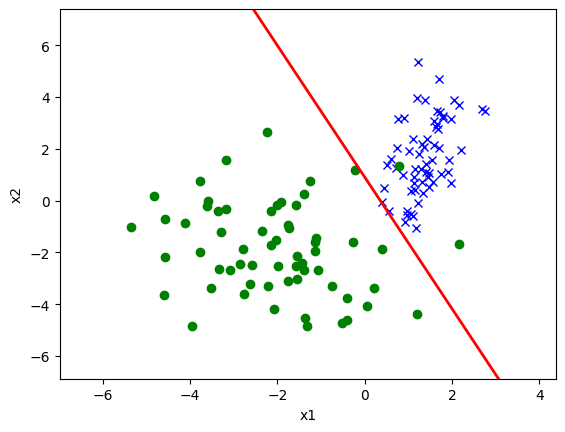

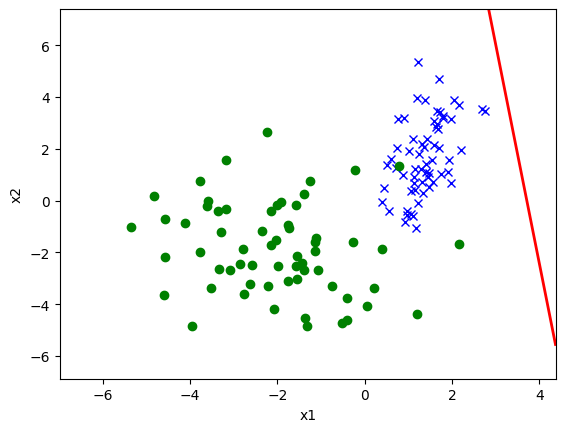

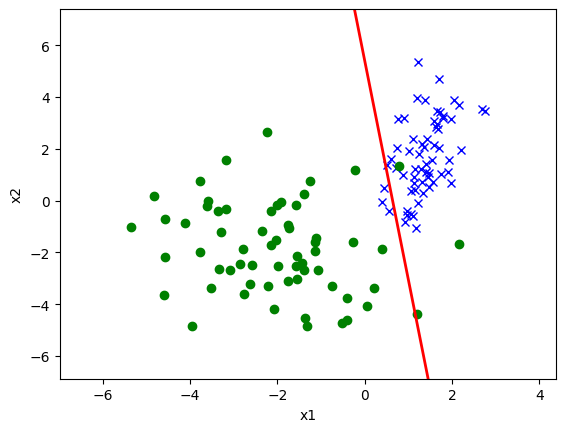

In [87]:
# Solution to 2(c), 2(d) and 2(e)

import numpy as np
import util

# Character to replace with sub-problem letter in plot_path/pred_path
WILDCARD = 'X'



def main(train_path, valid_path, test_path, pred_path):
    """Problem 2: Logistic regression for incomplete, positive-only labels.

    Run under the following conditions:
        1. on y-labels,
        2. on l-labels,
        3. on l-labels with correction factor alpha.

    Args:
        train_path: Path to CSV file containing training set.
        valid_path: Path to CSV file containing validation set.
        test_path: Path to CSV file containing test set.
        pred_path: Path to save predictions.
    """
    pred_path_c = pred_path.replace(WILDCARD, 'c')
    pred_path_d = pred_path.replace(WILDCARD, 'd')
    pred_path_e = pred_path.replace(WILDCARD, 'e')

    # *** START CODE HERE ***
    # Part (c): Train and test on true labels
    # Make sure to save outputs to pred_path_c

    # Initialise the model
    clf = LogisticRegression()
    # For this part, we will use the true labels t instead of the y labels
    x_train, t_train = util.load_dataset(train_path, label_col='t', add_intercept=True)
    # Fit the model
    clf.fit(x_train, t_train)
    # Load the test set
    x_test, t_test = util.load_dataset(test_path, label_col='t', add_intercept=True)
    # Make predictions on the test set
    t_pred = clf.predict(x_test)
    # Plot decision boundary
    a = util.plot(x_test, t_test, clf.theta)
    # Save the predictions to a text file
    np.savetxt(pred_path_c, t_pred)


    # Part (d): Train on y-labels and test on true labels
    # Make sure to save outputs to pred_path_d

    # Initialise the model
    clf2 = LogisticRegression()
    # For this part, we will train on the y labels
    x_train, y_train = util.load_dataset(train_path, label_col='y', add_intercept=True)
    # Fit the model
    clf2.fit(x_train, y_train)
    # Load the test set
    x_test, y_test = util.load_dataset(test_path, label_col='y', add_intercept=True)
    # Make predictions on the test set
    y_pred = clf2.predict(x_test)
    # Plot the predictions
    util.plot(x_test, t_test, clf2.theta)
    # Save the predictions to a text file
    np.savetxt(pred_path_d, y_pred)

    # Part (e): Apply correction factor using validation set and test on true labels
    # Plot and use np.savetxt to save outputs to pred_path_e

    # Import the training set
    x_valid, y_valid = util.load_dataset(valid_path, label_col='y', add_intercept=True)
    # Use the formula alpha = 1/|V_{+}| sum_{x^{(i)} in V_{+}} h_theta(x^{(i)})
    alpha = 1 / np.sum(y_valid[y_valid == 1]) * np.sum(clf2.predict(x_valid)[y_valid == 1])
    # Scale the predictions by alpha
    y_pred = clf2.predict(x_test) / alpha
    # Plot the validation set predictions
    util.plot(x_test, t_test, clf2.theta, correction=alpha)
   

    # *** END CODER HERE

if __name__ == '__main__':
    main(train_path='../data/ds3_train.csv',
        valid_path='../data/ds3_valid.csv',
        test_path='../data/ds3_test.csv',
        pred_path='./output/2X_pred.txt')


In [91]:
%%latex

The above figures represent the decision boundaries of a logistic classifier trained on:
1) True labels, trained on y labels 
2) Trained on y labels 
3) Trained on y labels with corrective factor applied.

<IPython.core.display.Latex object>